In [15]:
# 魔法函數（Magic Functions）: 可以將matplotlib的圖表直接嵌入到Notebook之中
%matplotlib notebook

## 9.1 matplotlib API概觀

In [ ]:
# 完整繪圖型態目錄
# https://matplotlib.org/stable/gallery/index.html

In [1]:
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd

### 圖和子圖

<IPython.core.display.Javascript object>


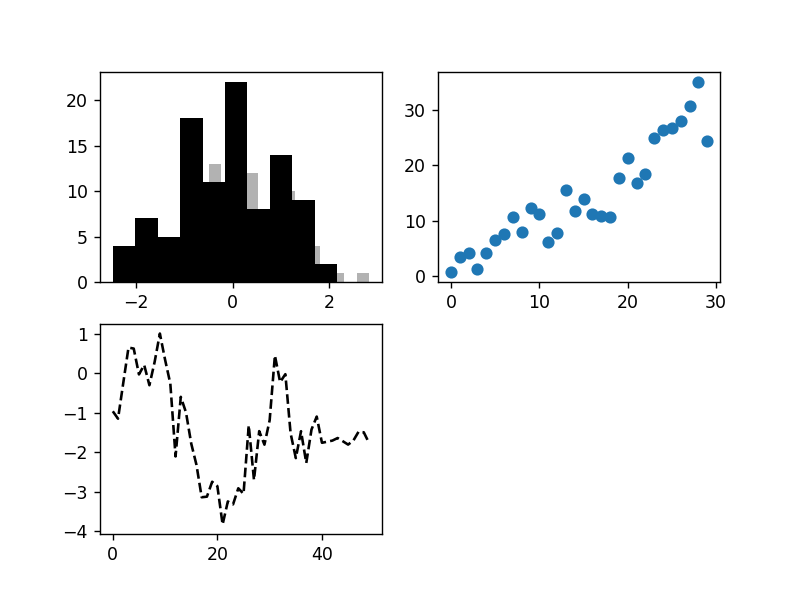

In [7]:
# 建立新的圖
fig = plt.figure()

In [8]:
# 命令其被規劃成四張子圖(2*2)，並從第一張子圖開始建立
ax1 = fig.add_subplot(2, 2, 1)

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2 ,3)

In [15]:
# matplotlib會在最近一個被使用的圖中作畫
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [17]:
# 直接在對應的空白子圖上畫圖
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [18]:
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<IPython.core.display.Javascript object>


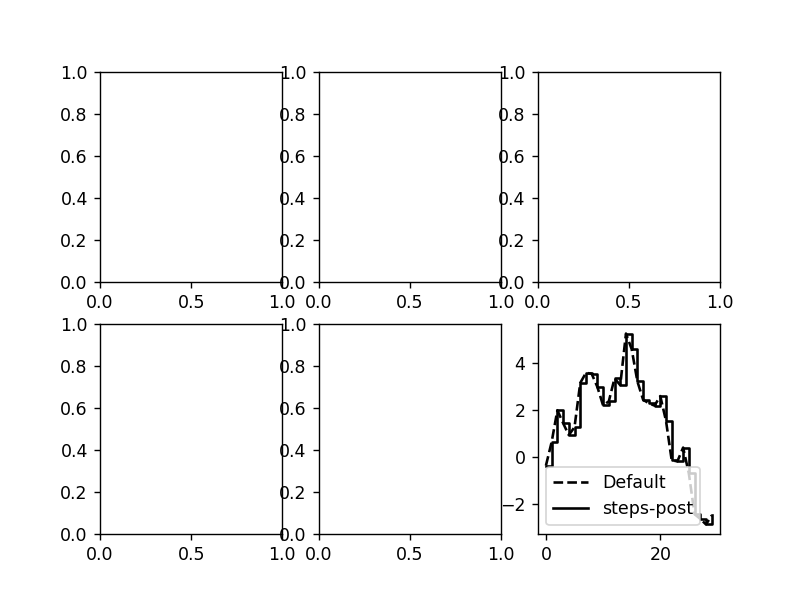

In [19]:
# 便利法: plt.subplots
fig, axes = plt.subplots(2, 3)

In [20]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [22]:
fig

<IPython.core.display.Javascript object>

### 調整子圖間留白

In [25]:
# Signature:
# plt.subplots_adjust(
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
#     hspace=None,
# )

<IPython.core.display.Javascript object>


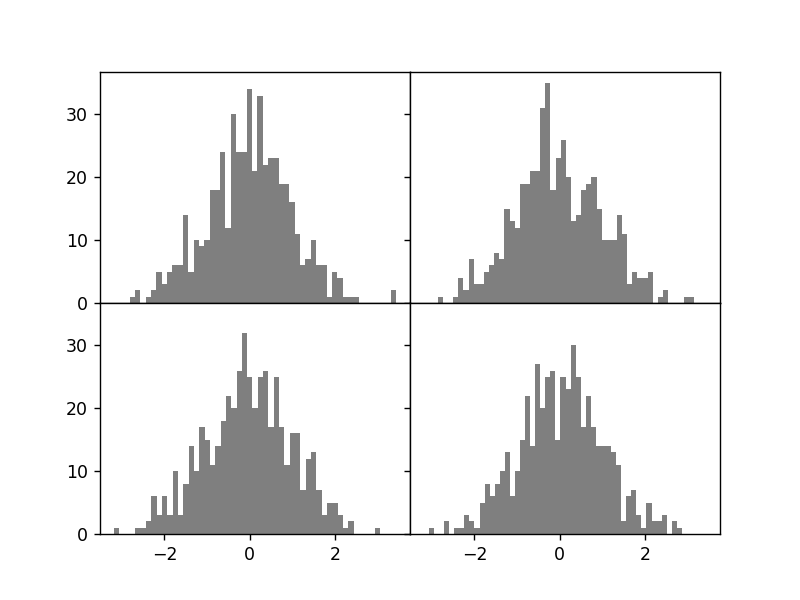

In [49]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 色彩、標示和線條樣式

In [32]:
plt.plot?

<IPython.core.display.Javascript object>


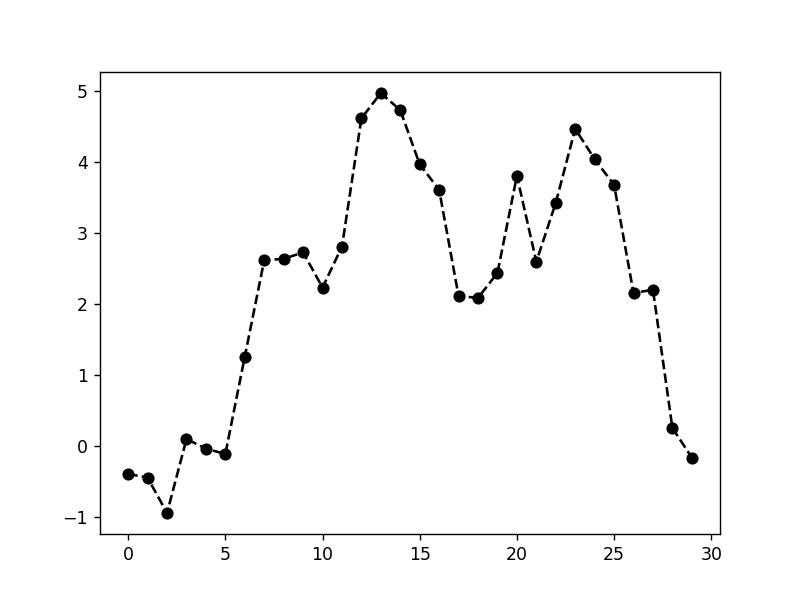

In [50]:
from numpy.random import randn
fig = plt.subplots()

plt.plot(randn(30).cumsum(), 'ko--')
# plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


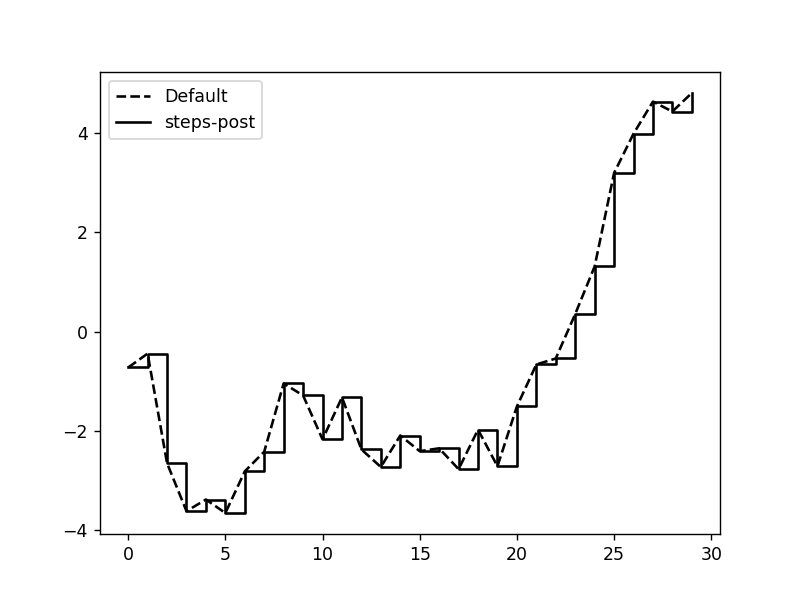

In [51]:
fig = plt.subplots()
data = np.random.randn(30).cumsum()

In [52]:
plt.plot(data, 'k--', label='Default')

In [53]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [54]:
plt.legend(loc='best')

### 設定主題、軸標籤、刻度和刻度標籤

<IPython.core.display.Javascript object>


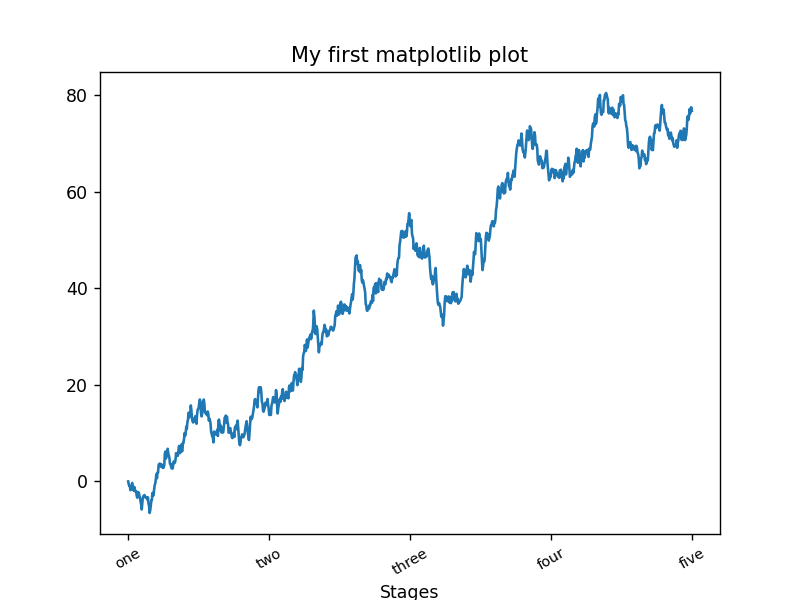

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [56]:
# 在哪裡放置刻度? 標籤所在位置
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [57]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# rotation: 軸標籤旋轉30度

In [58]:
# 設置子圖主題
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [61]:
# 設置軸名稱
ax.set_xlabel('Stages')

Text(0.5, 15.528422124795624, 'Stages')

In [63]:
# 其他等效寫法：
# props = {
#     'title': 'My first matplotlib plot',
#     'xlabel': 'Stages'
# }
# ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 15.528422124795624, 'Stages')]

### 加入圖例

<IPython.core.display.Javascript object>


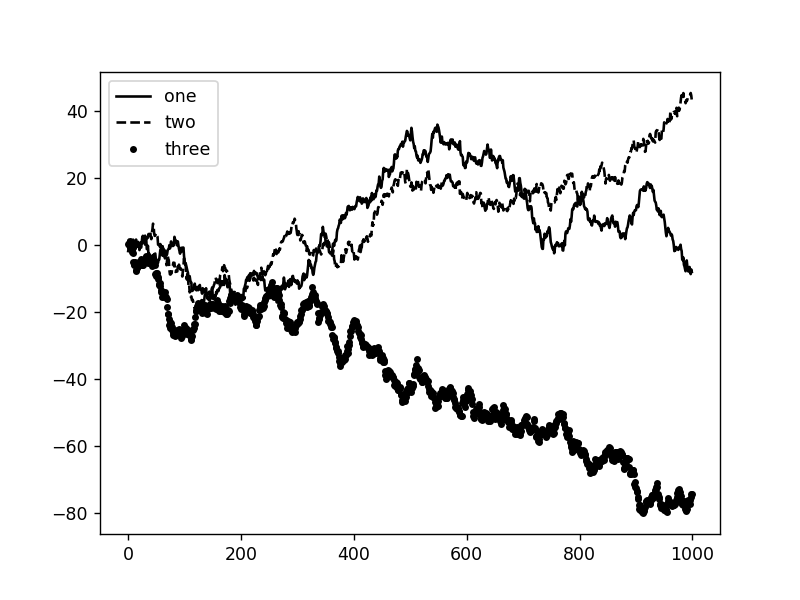

In [16]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [17]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [18]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [19]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [20]:
ax.legend(loc='best')

In [22]:
ax.legend?  # 放置圖例

### 注釋與畫圖形

In [24]:
import requests

In [28]:
request_url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv"
resp = requests.get(request_url)
# print(resp.status_code)
# print(resp.text)

resp_text = resp.text
file_name = request_url.split("/")[-1]

f = open(file_name, 'w')
f.write(resp_text)
f.close

<function TextIOWrapper.close()>

<IPython.core.display.Javascript object>


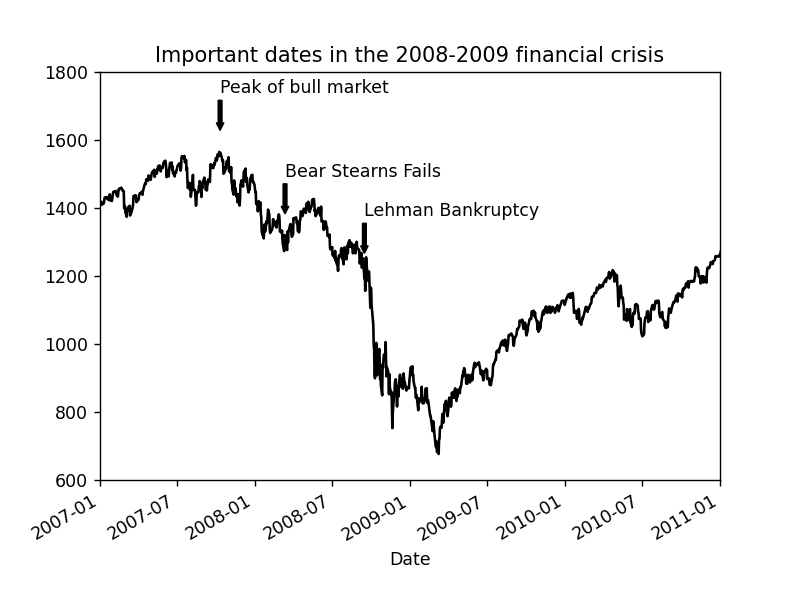

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [37]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col = 0, parse_dates = True)
# data.columns
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,
                xy = (date, spx.asof(date)+75),       # 被註釋的座標點
                xytext = (date, spx.asof(date)+225),  # 註釋文字的座標點
                arrowprops = dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment = 'left',
                verticalalignment = 'top')
    
# 只看2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


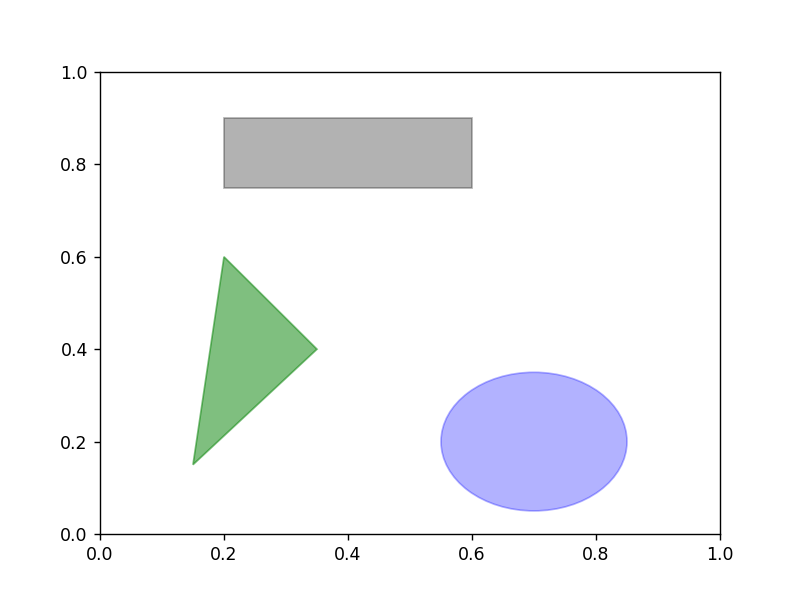

In [43]:
# 畫圖形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 把圖存檔

In [45]:
# plt.savefig('figpath.svg')
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib 設定

In [46]:
# 預設圖形大小變成 10* 10
plt.rc('figure', figsize=(10, 10))

---

## 9.2 用pandas和seaborn繪圖